In [1]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS

Cálculo de exceso de color estelar para desenrojecer el espectro por extinción interna usando Calzetti+2010

$E(B-V)_{estelar} = 0.44 * E(B-V)_{gaseoso}$

Para tener el valor de exceso de color estelar, primero debemos calcular el exceso de color gaseoso, haciendo uso de Dominguez+2013


$E(B-V)_{gas} = 1.97 * log_{10} \dfrac{(H_{\alpha}/H_{\beta})_{obs}}{2.86} $

el valor de A_v para slit 8 es 0.081850789029635149+/-0.063675267425131160

el valor de A_v para slit 14 es 0.188217124263584362+/-0.064060168552848407

el valor de A_v para slit 16 es 0.210030845514304093+/-0.088850540791892418

el valor de A_v para slit 27 es 0.248060874611782139+/-0.318270638904736669

In [8]:
A_v8 = 0.081850789029635149
A_v14 = 0.188217124263584362
A_v16 = 0.210030845514304093
A_v27 = 0.248060874611782139

SLIT 8

In [4]:
#abrir mi fits
#slit1_f99 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_2D_f99.fits'
slit8_f99 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8_2D_f99.fits'
sp8_f99 = fits.open(slit8_f99)

sp8_f99.info()
sp8_f99[0].header["OBJECT"]


Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8_2D_f99.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (2382, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2128/1534595312.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

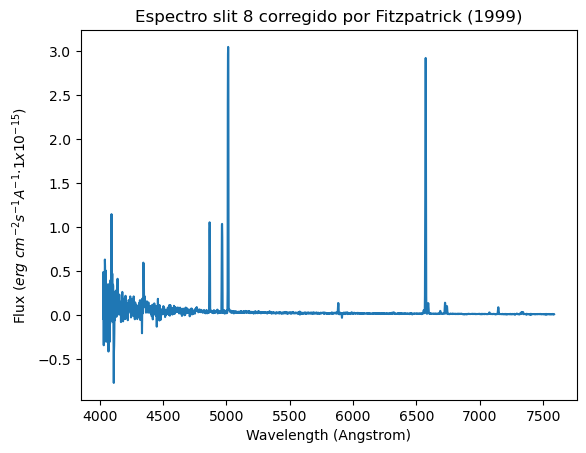

In [5]:
# extraer data (flux -ya corregido por f99-)
data8_f99=sp8_f99[0].data
header8_f99=sp8_f99[0].header
obj_name8_f99 = header8_f99.get("OBJECT", "Unknown")

flux8_f99=data8_f99[0]
w8_f99=WCS(header8_f99, naxis=1, relax=False, fix=False)
wave8_f99=w8_f99.wcs_pix2world(np.arange(len(flux8_f99)),0)[0]

plt.plot(wave8_f99, flux8_f99)
plt.title("Espectro slit 8 corregido por Fitzpatrick (1999)")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [6]:
wave8_f99, flux8_f99

(array([4028.45336914, 4029.94731426, 4031.44125938, ..., 7582.54881382,
        7584.04275894, 7585.53670406]),
 array([-0.04084318,  0.4895398 ,  0.16375652, ...,  0.01176331,
         0.01297251,  0.01030601], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2128/1582194554.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


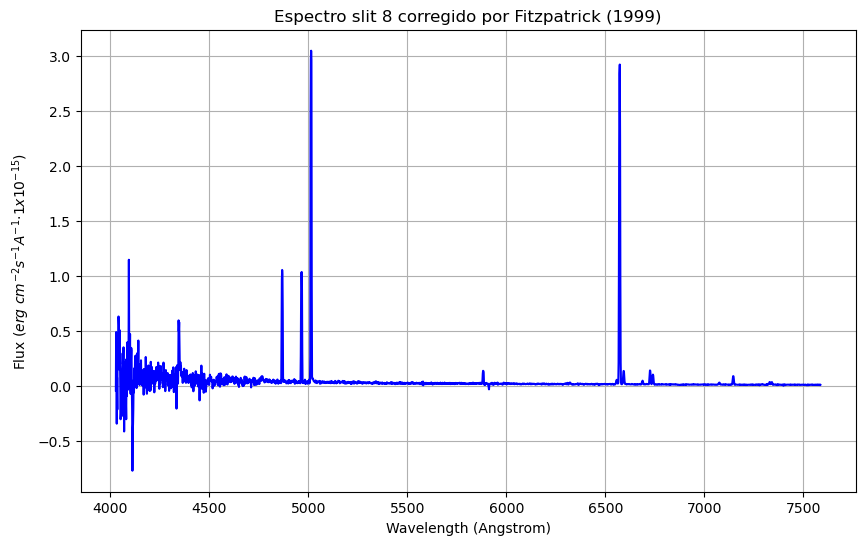

In [7]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave8_f99, flux8_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 8 corregido por Fitzpatrick (1999)')
plt.grid(True)
plt.show()

In [9]:
import extinction
from extinction import calzetti00

#tengo mi array de longitudes de onda de todo el espectro: wave1_f99
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v es A_v1 
wave8_f99_c00 = extinction.calzetti00(wave8_f99, A_v8, 4.05)
print(f' extinción en magnitudes para slit 8 con calzetti00: {wave8_f99_c00}') #array of extinction in magnitudes at each input wavelength


 extinción en magnitudes para slit 8 con calzetti00: [0.1107639  0.11072783 0.11069177 ... 0.0557645  0.05574998 0.05573546]


In [10]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 8: {flux8_f99}')

# "deredden" flux by A_v1 with calzetti+2000
flux8_f99_c00 = remove(calzetti00(wave8_f99, A_v8, 4.05), flux8_f99)
print(f'valor de flujo deredden para slit 8 con calzetti00: {flux8_f99_c00}')

valor de flujo corregido por f99 para slit 8: [-0.04084318  0.4895398   0.16375652 ...  0.01176331  0.01297251
  0.01030601]
valor de flujo deredden para slit 8 con calzetti00: [-0.04522984  0.54209966  0.18133236 ...  0.01238327  0.01365601
  0.01084888]


In [11]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 8: {flux8_f99}')

# "deredden" flux by A_v1 with calzetti+2000
fflux8_f99_c00 = remove(calzetti00(wave8_f99, 0.081850789029635149, 4.05), flux8_f99)
print(f'valor de flujo deredden para slit 8 con calzetti00: {fflux8_f99_c00}')

valor de flujo corregido por f99 para slit 8: [-0.04084318  0.4895398   0.16375652 ...  0.01176331  0.01297251
  0.01030601]
valor de flujo deredden para slit 8 con calzetti00: [-0.04522984  0.54209966  0.18133236 ...  0.01238327  0.01365601
  0.01084888]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2128/3742495889.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


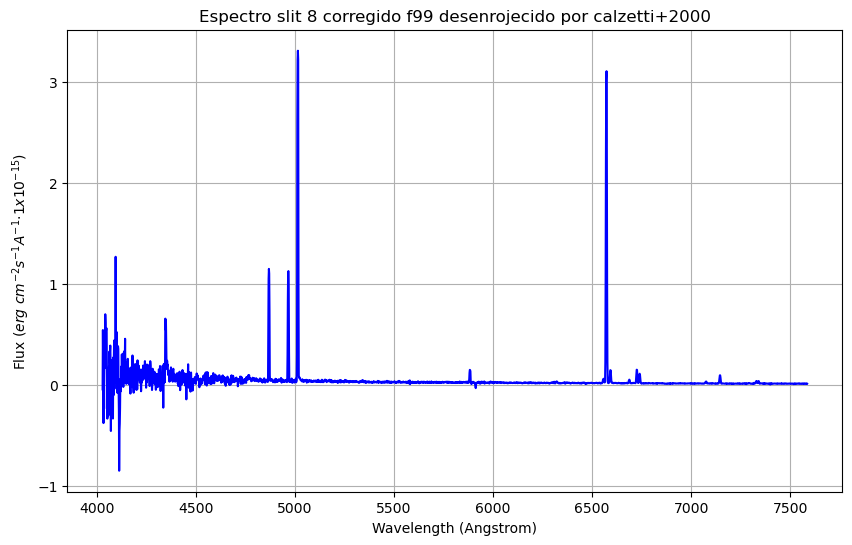

In [12]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave8_f99, flux8_f99_c00, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 8 corregido f99 desenrojecido por calzetti+2000')
plt.grid(True)
plt.show()

In [14]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data8_f99[0] = flux8_f99_c00

# crear nuevo HDU 
slit8corrected = fits.PrimaryHDU(data=data8_f99, header=header8_f99)

# crear nuevo HDUList para guardar en un fits
sp8_corrected = fits.HDUList([slit8corrected])

# guardar datos corregidos en un nuevo archivo FITS
#new_fits_file1 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_2D_f99_c00.fits'
new_fits_file8 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8_2D_f99_c00.fits'
sp8_corrected.writeto(new_fits_file8, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file8}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit8_2D_f99_c00.fits


SLIT 14

In [15]:
#abrir mi fits
#slit1_f99 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_2D_f99.fits'
slit14_f99 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14_2D_f99.fits'
sp14_f99 = fits.open(slit14_f99)

sp14_f99.info()
sp14_f99[0].header["OBJECT"]


Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14_2D_f99.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (2809, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2128/1444614028.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

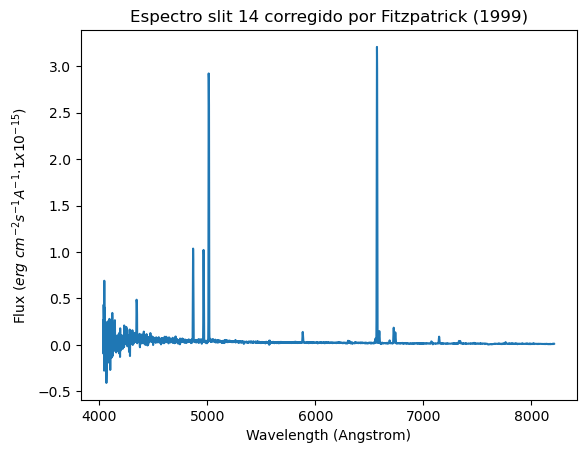

In [16]:
# extraer data (flux -ya corregido por f99-)
data14_f99=sp14_f99[0].data
header14_f99=sp14_f99[0].header
obj_name14_f99 = header14_f99.get("OBJECT", "Unknown")

flux14_f99=data14_f99[0]
w14_f99=WCS(header14_f99, naxis=1, relax=False, fix=False)
wave14_f99=w14_f99.wcs_pix2world(np.arange(len(flux14_f99)),0)[0]

plt.plot(wave14_f99, flux14_f99)
plt.title("Espectro slit 14 corregido por Fitzpatrick (1999)")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [17]:
wave14_f99, flux14_f99

(array([4036.02270508, 4037.50927031, 4038.99583554, ..., 8207.32474685,
        8208.81131208, 8210.29787731]),
 array([ 0.17694116,  0.26874995, -0.09579954, ...,  0.00938409,
         0.0087871 ,  0.01028619], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2128/2714010254.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


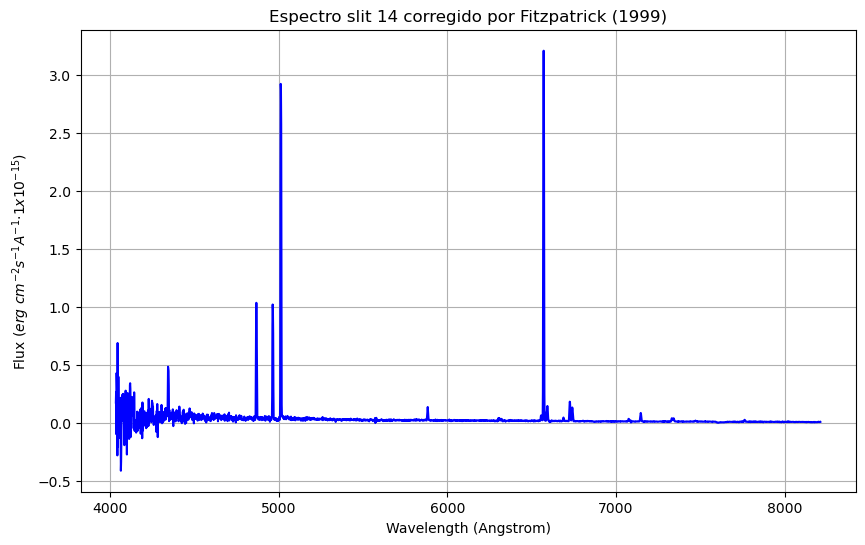

In [18]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave14_f99, flux14_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 14 corregido por Fitzpatrick (1999)')
plt.grid(True)
plt.show()

In [19]:
import extinction
from extinction import calzetti00

#tengo mi array de longitudes de onda de todo el espectro: wave1_f99
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v es A_v1 
wave14_f99_c00 = extinction.calzetti00(wave14_f99, A_v14, 4.05)
print(f' extinción en magnitudes para slit 14 con calzetti00: {wave14_f99_c00}') #array of extinction in magnitudes at each input wavelength


 extinción en magnitudes para slit 14 con calzetti00: [0.25428336 0.25420101 0.2541187  ... 0.11532911 0.11530076 0.11527241]


In [20]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 14: {flux14_f99}')

# "deredden" flux by A_v1 with calzetti+2000
flux14_f99_c00 = remove(calzetti00(wave14_f99, A_v14, 4.05), flux14_f99)
print(f'valor de flujo deredden para slit 14 con calzetti00: {flux14_f99_c00}')

valor de flujo corregido por f99 para slit 14: [ 0.17694116  0.26874995 -0.09579954 ...  0.00938409  0.0087871
  0.01028619]
valor de flujo deredden para slit 14 con calzetti00: [ 0.22363625  0.3396478  -0.12106286 ...  0.01043576  0.00977161
  0.01143835]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2128/1873510790.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


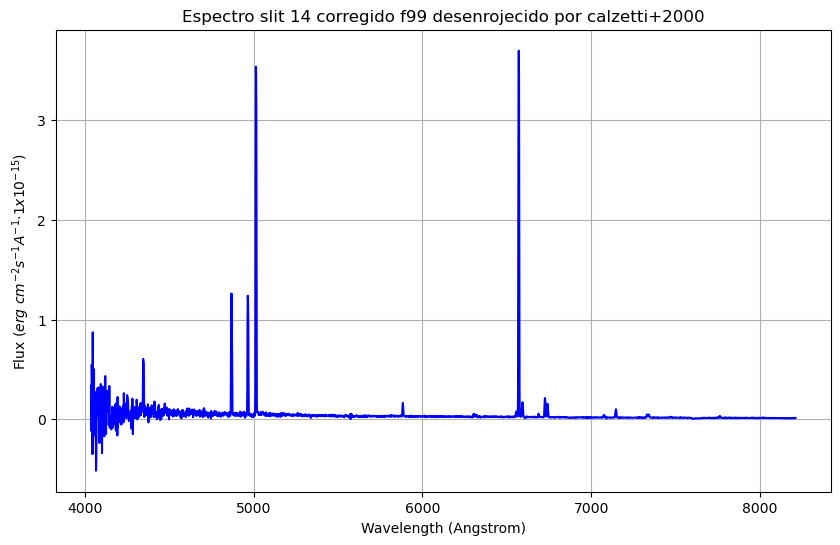

In [21]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave14_f99, flux14_f99_c00, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 14 corregido f99 desenrojecido por calzetti+2000')
plt.grid(True)
plt.show()

In [22]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data14_f99[0] = flux14_f99_c00

# crear nuevo HDU 
slit14corrected = fits.PrimaryHDU(data=data14_f99, header=header14_f99)

# crear nuevo HDUList para guardar en un fits
sp14_corrected = fits.HDUList([slit14corrected])

# guardar datos corregidos en un nuevo archivo FITS
#new_fits_file1 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_2D_f99_c00.fits'
new_fits_file14 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14_2D_f99_c00.fits'
sp14_corrected.writeto(new_fits_file14, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file14}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit14_2D_f99_c00.fits


SLIT 16

In [23]:
#abrir mi fits
#slit1_f99 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_2D_f99.fits'
slit16_f99 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit16_2D_f99.fits'
sp16_f99 = fits.open(slit16_f99)

sp16_f99.info()
sp16_f99[0].header["OBJECT"]


Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit16_2D_f99.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (2696, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2128/3771171671.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

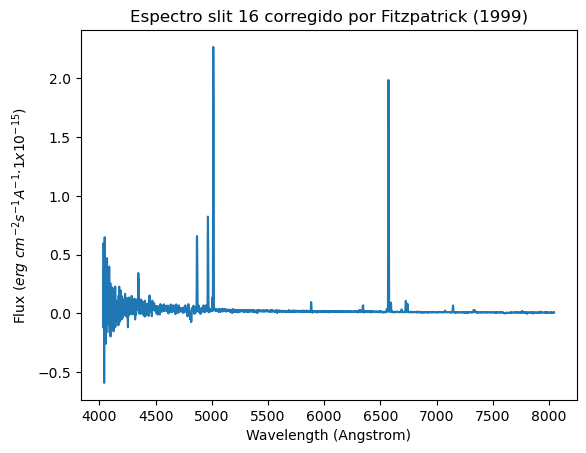

In [24]:
# extraer data (flux -ya corregido por f99-)
data16_f99=sp16_f99[0].data
header16_f99=sp16_f99[0].header
obj_name16_f99 = header16_f99.get("OBJECT", "Unknown")

flux16_f99=data16_f99[0]
w16_f99=WCS(header16_f99, naxis=1, relax=False, fix=False)
wave16_f99=w16_f99.wcs_pix2world(np.arange(len(flux16_f99)),0)[0]

plt.plot(wave16_f99, flux16_f99)
plt.title("Espectro slit 16 corregido por Fitzpatrick (1999)")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [25]:
wave16_f99, flux16_f99

(array([4033.59643555, 4035.08519685, 4036.57395816, ..., 8042.83063209,
        8044.3193934 , 8045.8081547 ]),
 array([ 0.38403136, -0.12107672,  0.59816635, ...,  0.00688056,
         0.0077779 ,  0.00819994], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2128/712776733.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


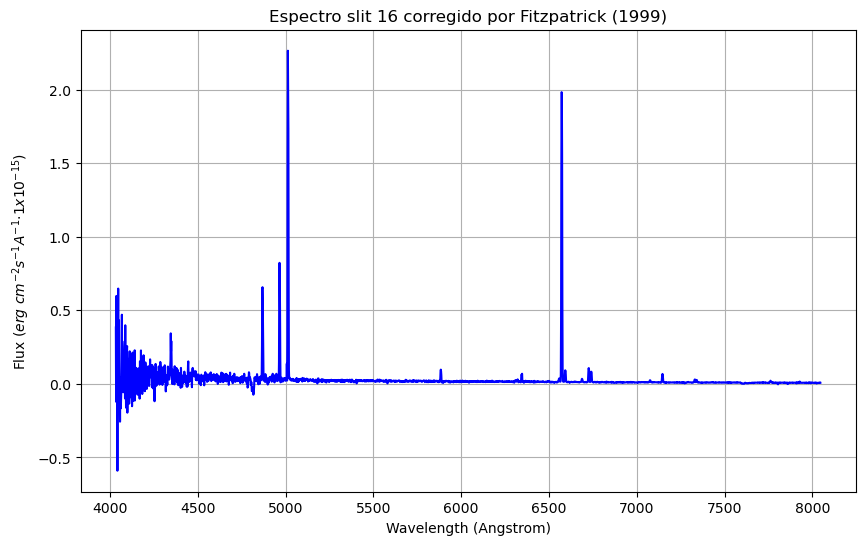

In [26]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave16_f99, flux16_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 16 corregido por Fitzpatrick (1999)')
plt.grid(True)
plt.show()

In [27]:
import extinction
from extinction import calzetti00

#tengo mi array de longitudes de onda de todo el espectro: wave1_f99
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v es A_v1 
wave16_f99_c00 = extinction.calzetti00(wave16_f99, A_v16, 4.05)
print(f' extinción en magnitudes para slit 16 con calzetti00: {wave16_f99_c00}') #array of extinction in magnitudes at each input wavelength


 extinción en magnitudes para slit 16 con calzetti00: [0.28390401 0.28381191 0.28371985 ... 0.13226908 0.13223608 0.13220309]


In [28]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 16: {flux16_f99}')

# "deredden" flux by A_v1 with calzetti+2000
flux16_f99_c00 = remove(calzetti00(wave16_f99, A_v16, 4.05), flux16_f99)
print(f'valor de flujo deredden para slit 16 con calzetti00: {flux16_f99_c00}')

valor de flujo corregido por f99 para slit 16: [ 0.38403136 -0.12107672  0.59816635 ...  0.00688056  0.0077779
  0.00819994]
valor de flujo deredden para slit 16 con calzetti00: [ 0.49880212 -0.1572481   0.77680125 ...  0.00777197  0.0087853
  0.00926172]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2128/3645981596.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


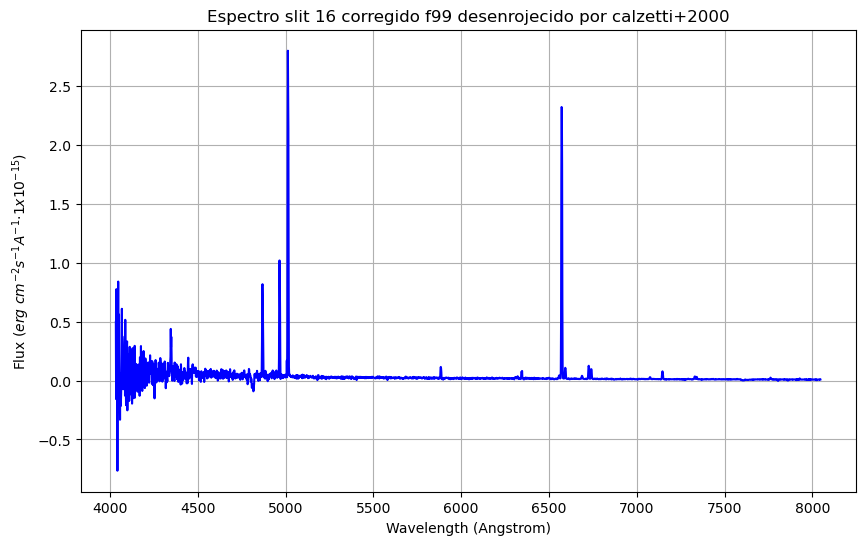

In [29]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave16_f99, flux16_f99_c00, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 16 corregido f99 desenrojecido por calzetti+2000')
plt.grid(True)
plt.show()

In [30]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data16_f99[0] = flux16_f99_c00

# crear nuevo HDU 
slit16corrected = fits.PrimaryHDU(data=data16_f99, header=header16_f99)

# crear nuevo HDUList para guardar en un fits
sp16_corrected = fits.HDUList([slit16corrected])

# guardar datos corregidos en un nuevo archivo FITS
#new_fits_file1 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_2D_f99_c00.fits'
new_fits_file16 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit16_2D_f99_c00.fits'
sp16_corrected.writeto(new_fits_file16, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file16}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit16_2D_f99_c00.fits


SLIT 27

In [31]:
#abrir mi fits
#slit1_f99 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_2D_f99.fits'
slit27_f99 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit27_2D_f99.fits'
sp27_f99 = fits.open(slit27_f99)

sp27_f99.info()
sp27_f99[0].header["OBJECT"]


Filename: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit27_2D_f99.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      68   (2699, 1)   float32   


'NGC1313-FIELD2 MASK02_median_avsig'

<>:13: SyntaxWarning: invalid escape sequence '\ '
<>:13: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2128/16936013.py:13: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux $(erg\\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

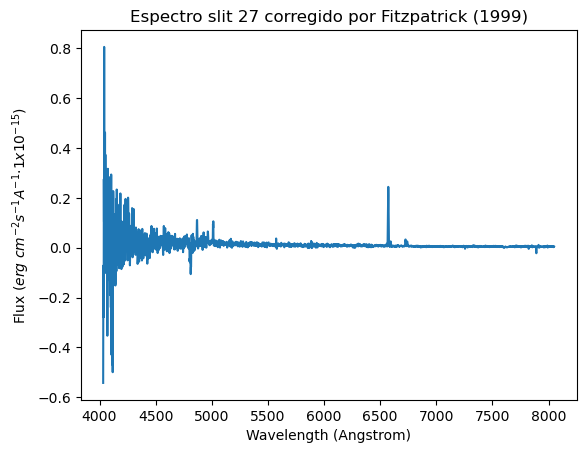

In [32]:
# extraer data (flux -ya corregido por f99-)
data27_f99=sp27_f99[0].data
header27_f99=sp27_f99[0].header
obj_name27_f99 = header27_f99.get("OBJECT", "Unknown")

flux27_f99=data27_f99[0]
w27_f99=WCS(header27_f99, naxis=1, relax=False, fix=False)
wave27_f99=w27_f99.wcs_pix2world(np.arange(len(flux27_f99)),0)[0]

plt.plot(wave27_f99, flux27_f99)
plt.title("Espectro slit 27 corregido por Fitzpatrick (1999)")
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1 x 10^{-15})$')

In [33]:
wave27_f99, flux27_f99

(array([4032.66870117, 4034.15737641, 4035.64605165, ..., 8046.13713932,
        8047.62581456, 8049.11448979]),
 array([-0.54268605, -0.07178093, -0.1771851 , ...,  0.00449349,
         0.00626892,  0.00568345], dtype='>f4'))

<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2128/2889064287.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


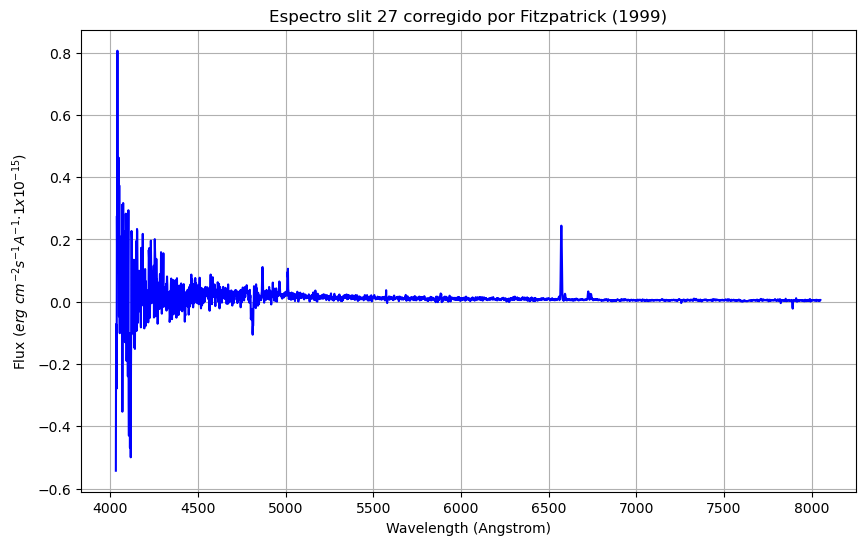

In [34]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave27_f99, flux27_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 27 corregido por Fitzpatrick (1999)')
plt.grid(True)
plt.show()

In [35]:
import extinction
from extinction import calzetti00

#tengo mi array de longitudes de onda de todo el espectro: wave1_f99
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v es A_v1 
wave27_f99_c00 = extinction.calzetti00(wave27_f99, A_v27, 4.05)
print(f' extinción en magnitudes para slit 27 con calzetti00: {wave27_f99_c00}') #array of extinction in magnitudes at each input wavelength


 extinción en magnitudes para slit 27 con calzetti00: [0.33537797 0.33526917 0.33516042 ... 0.15613233 0.15609339 0.15605447]


In [36]:
from extinction import calzetti00, remove

print(f'valor de flujo corregido por f99 para slit 27: {flux27_f99}')

# "deredden" flux by A_v1 with calzetti+2000
flux27_f99_c00 = remove(calzetti00(wave27_f99, A_v27, 4.05), flux27_f99)
print(f'valor de flujo deredden para slit 27 con calzetti00: {flux27_f99_c00}')

valor de flujo corregido por f99 para slit 27: [-0.54268605 -0.07178093 -0.1771851  ...  0.00449349  0.00626892
  0.00568345]
valor de flujo deredden para slit 27 con calzetti00: [-0.73909428 -0.09774999 -0.24126336 ...  0.00518844  0.00723819
  0.00656197]


<>:5: SyntaxWarning: invalid escape sequence '\ '
<>:5: SyntaxWarning: invalid escape sequence '\ '
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2128/3234583805.py:5: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')


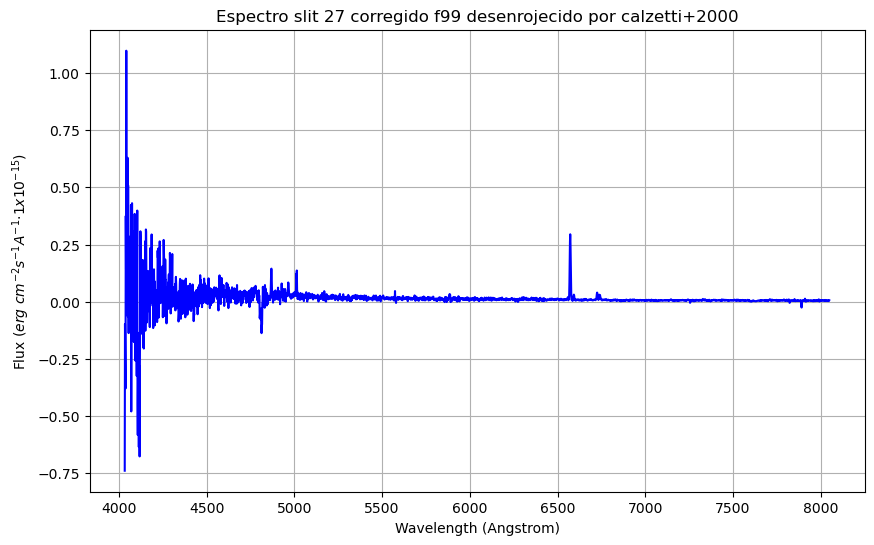

In [37]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave27_f99, flux27_f99_c00, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 27 corregido f99 desenrojecido por calzetti+2000')
plt.grid(True)
plt.show()

In [38]:
# guardar info corregida en un nuevo fits
# metemos el array de flujo corregido a la data del espectro
data27_f99[0] = flux27_f99_c00

# crear nuevo HDU 
slit27corrected = fits.PrimaryHDU(data=data27_f99, header=header27_f99)

# crear nuevo HDUList para guardar en un fits
sp27_corrected = fits.HDUList([slit27corrected])

# guardar datos corregidos en un nuevo archivo FITS
#new_fits_file1 = '../../Documentos/RESPALDO/NGC1313_250624_extinction/datos/slit1_2D_f99_c00.fits'
new_fits_file27 = '../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit27_2D_f99_c00.fits'
sp27_corrected.writeto(new_fits_file27, overwrite=True)

print(f"Se ha guardado el archivo FITS corregido: {new_fits_file27}")

Se ha guardado el archivo FITS corregido: ../../../../reduccion/NGC1313/cal2_pcULS/espectros/slit27_2D_f99_c00.fits
